In [12]:
import os
import matplotlib.pyplot as plt
from kuibit.simdir import SimDir
import kuibit.visualize_matplotlib as viz

datadir = os.environ["HOME"]+"/simulations/tov_ET"
datadir2 = os.environ["HOME"]+"/simulations/tov_ET7"

sim = SimDir(datadir)
sim2 = SimDir(datadir2)

iteration_number = 0
rho = sim.timeseries.maximum['rho']
rho2 = sim2.gridfunctions.x["rho"]


/home/dhruv/.local/lib/python3.11/site-packages/kuibit/cactus_grid_functions.py:1526: UserWarning: You are using ASCII files, which have no information about ghost zone information. Set the attribute num_ghost of this object to properly account for the ghost zones. 
  warnings.warn(


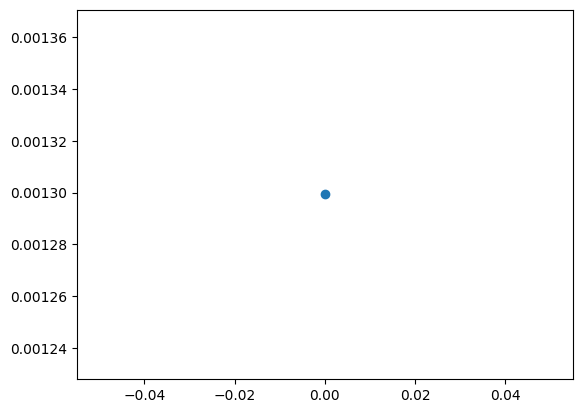

In [6]:
# this cell shows the expected plot using previously stored data
import numpy as np

# reconstruct plot data from saved strings
(quant_diff_s, minval, maxval, delta_t) = \
  ("ff8baee2e5d2ac70320c0007182c404f5b656f7b8897a8bbcddde8eeede8ddcfc0b0a29589817b777473757a8189929ca6b0bac4cbd0d3d4d4d2cfcbc7c2bdb8b4b0adaaa9a8a9abaeb3b8bcc1c5c8cccf",
   1.235e-03, 1.280e-03, 5.000e+00)
quant_diff = np.array(bytearray.fromhex(quant_diff_s))
rec_vals = quant_diff / 255. * (maxval- minval) + minval
rec_time = np.arange(0,len(quant_diff)) * delta_t

# plot them, including your results if you have them
#plt.plot(rec_time, rec_vals/rec_vals[0],
#         label="central density (stored values)")
#plt.plot(rho2/rho2(0), label="central density (your results)")
plt.scatter(rho2.t, rho2.y)


In [14]:
print(rho2[0])

Available refinement levels (components):
0 (1)
1 (1)
Spacing at coarsest level (0): [2.]
Spacing at finest level (1): [1.]


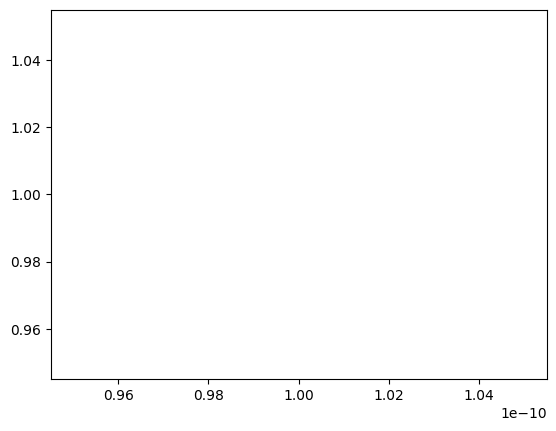

In [25]:
rho_xy_unif = rho2[0].to_UniformGridData(shape=100, 
                                        x0=0,
                                        x1=10,
                                        resample=True)

# Undo reflection symmetry on the x axis
rho_xy_unif.reflection_symmetry_undo(dimension=0)

plt.plot(rho_xy_unif[1],[1]
              )